
 CRISP-DM Project: Breast-cancer Detection
 



## 1. Problem Statement

Breast cancer remains one of the most common and life-impacting cancers worldwide. Early and accurate detection is essential for improving patient outcomes, guiding clinical decisions, and reducing unnecessary medical interventions.

Machine learning (ML) offers powerful tools for analyzing biomedical datasets such as the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset, which contains 569 samples described by 30 numerical features extracted from digitized Fine Needle Aspirate (FNA) images. These features capture important morphological characteristics of cell nuclei (radius, texture, smoothness, concavity, symmetry, fractal dimension, etc.).

The goal is to evaluate how well each model distinguishes between **benign** and **malignant** tumors and determine which methods provide the strongest diagnostic support for medical use.
# Phase 1 — Business Understanding

....Business Objectives (BO)....

## BO1 — 
 Detect breast cancer as early as possible.

## BO2 — 
Help doctors make faster and more accurate diagnostic decisions.

## BO3 —
 Reduce unnecessary tests, biopsies, and medical procedures.

## BO4 — 
 Prioritize patients who require urgent medical attention.

....Data Science Objectives (DSO)....

## DSO1  
Use high-performance model to accurately predict malignant tumors early by learning patterns in WDBC feature distributions.

## DSO2 
Implement fast and interpretable models and compare them with deeper models to provide clinicians with quick and reliable diagnostic predictions.

## DSO3
Evaluate **selectivity (TNR)** and **fall-out (FPR)** across several models to identify those that minimize false alarms and reduce unnecessary procedures.

## DSO4
Focus on models with high **recall (TPR)** such as MLP, GRU-SVM, and Linear SVM to detect malignant cases with low false negative rates, ensuring high-risk patients receive immediate attention.



### Benchmark Table for All Models (With DSO Mapping)

| Model               | Accuracy | Recall (TPR) | Selectivity (TNR) | Fall-out (FPR) | FNR | Related DSO(s) |
|---------------------|----------|--------------|--------------------|----------------|-----|----------------|
| **Preprocessing & Feature DSOs** |||||||
| Dataset Preparation |    –     |      –       |        –           |       –        |  –  | **DSO1 & DSO2** |
| Feature Scaling     |    –     |      –       |        –           |       –        |  –  | **DSO1 & DSO2** |
| PCA / Dimensionality Reduction | – | – | – | – | – | **DSO2** |
| **Model Evaluation DSOs** |||||||
| Linear Regression   |          |              |                    |                |     | **DSO3**        |
| Softmax Regression  |          |              |                    |                |     | **DSO3**        |
| k-NN (k=5)          |          |              |                    |                |     | **DSO3**        |
| Linear SVM          |          |              |                    |                |     | **DSO3 & DSO4** |
| MLP (500-500-500)   |          |              |                    |                |     | **DSO4**        |
| GRU-SVM             |          |              |                    |                |     | **DSO4**        |


 Phase 2: Data Understanding


In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# reading data into the dataframe
df = pd.read_csv('data.csv')


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_prognostic = fetch_ucirepo(id=16) 
  
# data (as pandas dataframes) 
X1 = breast_cancer_wisconsin_prognostic.data.features 
y1 = breast_cancer_wisconsin_prognostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_prognostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_prognostic.variables) 


{'uci_id': 16, 'name': 'Breast Cancer Wisconsin (Prognostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/16/breast+cancer+wisconsin+prognostic', 'data_url': 'https://archive.ics.uci.edu/static/public/16/data.csv', 'abstract': 'Prognostic Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 198, 'num_features': 33, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Outcome'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1995, 'last_updated': 'Sun Jan 14 2024', 'dataset_doi': '10.24432/C5GK50', 'creators': ['William Wolberg', 'W. Street', 'Olvi Mangasarian'], 'intro_paper': None, 'additional_info': {'summary': 'Each record represents follow-up data for one breast cancer case.  These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive brea

In [5]:
X1.head()

Time  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    31    18.02     27.60      117.50  1013.0      0.09489        0.1036   
1    61    17.99     10.38      122.80  1001.0      0.11840        0.2776   
2   116    21.37     17.44      137.50  1373.0      0.08836        0.1189   
3   123    11.42     20.38       77.58   386.1      0.14250        0.2839   
4    27    20.29     14.34      135.10  1297.0      0.10030        0.1328   

   concavity1  concave_points1  symmetry1  ...  perimeter3   area3  \
0      0.1086          0.07055     0.1865  ...      139.70  1436.0   
1      0.3001          0.14710     0.2419  ...      184.60  2019.0   
2      0.1255          0.08180     0.2333  ...      159.10  1949.0   
3      0.2414          0.10520     0.2597  ...       98.87   567.7   
4      0.1980          0.10430     0.1809  ...      152.20  1575.0   

   smoothness3  compactness3  concavity3  concave_points3  symmetry3  \
0       0.1195        0.1926      0.3140           0.1170     0.2677   
1       0.1622        0.6656      0.7119           0.2654     0.4601   
2       0.1188        0.3449      0.3414           0.2032     0.4334   
3       0.2098        0.8663      0.6869           0.2575     0.6638   
4       0.1374        0.2050      0.4000           0.1625     0.2364   

   fractal_dimension3  tumor_size  lymph_node_status  
0             0.08113         5.0                5.0  
1             0.11890         3.0                2.0  
2             0.09067         2.5                0.0  
3             0.17300         2.0                0.0  
4             0.07678         3.5                0.0  

[5 rows x 33 columns]

**Interpretation:** 👉 


In [5]:
# displaying first five rows
df.head(20)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   
15  84799002         M        14.54         27.54           96.73      658.8   
16    848406         M        14.68         20.13           94.74      684.5   
17  84862001         M        16.13         20.68          108.10      798.8   
18    849014         M        19.81         22.15          130.00     1260.0   
19   8510426         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0.14790              0.09498   
19          0.09779           0.08129         0.06664              0.04781   

    ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0   ...          17.33           184.60      2019.0            0.1622   
1   ...          23.41           158.80      1956.0            0.1238   
2   ...          25.53           152.50      1709.0            0.1444   
3   ...          26.50            98.87       567.7            0.2098   
4   ...          16.67           152.20      1575.0            0.1374   
5   ...          23.75           103.40       741.6            0.1791   
6   ...          27.66           153.20      1606.0            0.1442   
7   ...          28.14           110.60       897.0            0.1654   
8   ...          30.73           

In [6]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

**Interpretation:** 👉 




In [7]:
# shape of the dataframe
df.shape

(569, 33)

In [8]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# column names
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
# checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# descriptive statistics of data
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

C:\Users\fadih\AppData\Local\Temp\ipykernel_25648\2639374068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette='magma')


<Axes: xlabel='diagnosis', ylabel='count'>

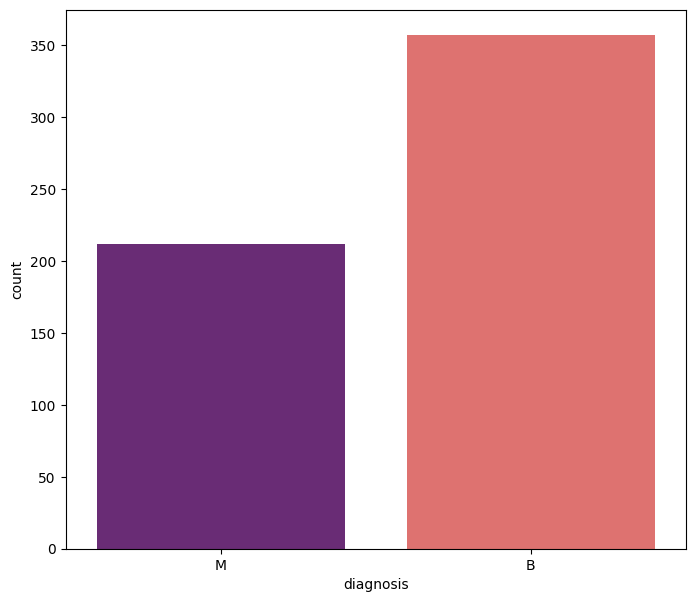

In [12]:
# countplot
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

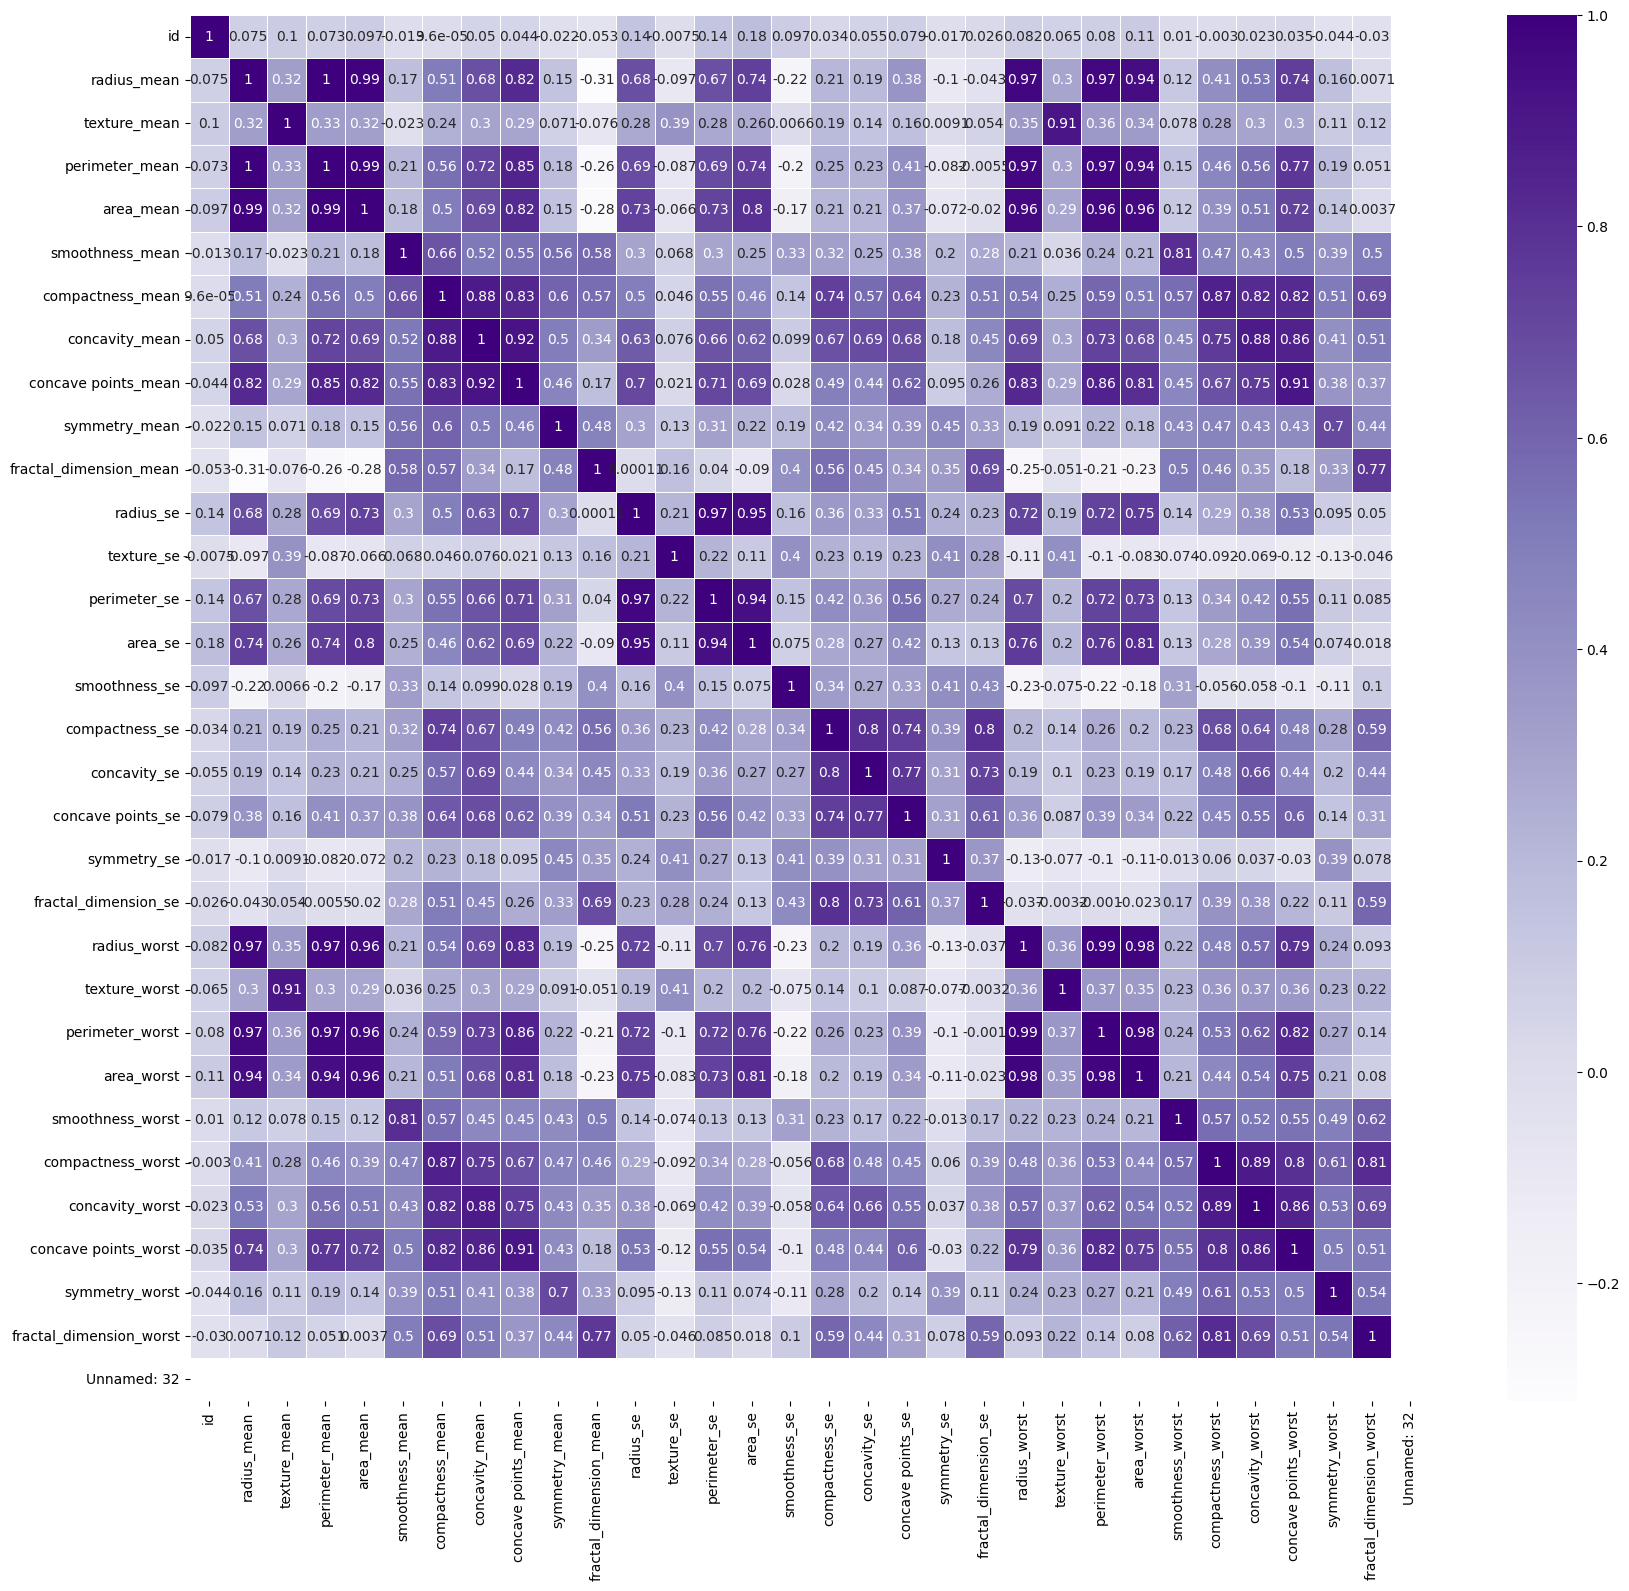

In [13]:
# heatmap
plt.figure(figsize=(20,18))
# compute correlation only on numeric columns to avoid converting non-numeric 'diagnosis'
num_df = df.select_dtypes(include=[np.number])
sns.heatmap(num_df.corr(), annot=True, linewidths=.5, cmap="Purples")
plt.show()

📌 1. Forte redondance entre plusieurs variables (corrélation > 0.9):On observe des blocs très foncés (correlation élevée), notamment entre :

🔹 Variables liées à la taille des cellules

radius_mean ↔ perimeter_mean ↔ area_mean

Même chose pour leurs équivalents _worst et _se.

Ces variables mesurent pratiquement la même chose :
👉 plus le rayon augmente, plus le périmètre et l’aire augmentent mécaniquement.

📌 2. Forte corrélation entre variables de “forme”:Les variables liées à l’irrégularité et à la netteté des contours montrent aussi de très fortes corrélations :

concavity_mean

concave points_mean

compactness_mean

Ces 3 variables augmentent ensemble lorsque le contour de la tumeur devient plus irrégulier.

📌 3. Les variables _worst sont toujours très corrélées avec les variables _mean:Exemples :

radius_mean ↔ radius_worst

texture_mean ↔ texture_worst

concave points_mean ↔ concave points_worst

Cela confirme que les variables _worst ne sont pas indépendantes :
elles représentent simplement la valeur maximale observée pour la même caractéristique.

📌 4. Les variables _se sont moins corrélées:👉 Elles reflètent la variation ou l’irrégularité des mesures, et donc apportent une information différente.

📌 5. Variables inutiles détectées:Deux colonnes montrent une faible utilité pour le modèle :

id → identifiant inutile

Unnamed: 32 → colonne vide (NaN)

👉 Elles doivent être retirées (ce que tu as fait correctement).

📌 6. Corrélations proches de zéro:ertaines variables montrent très peu de relation avec les autres, ex :

smoothness_se

fractal_dimension_se

👉 Elles représentent des détails très fins qui ne dépendent pas directement de la taille/forme globale.

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

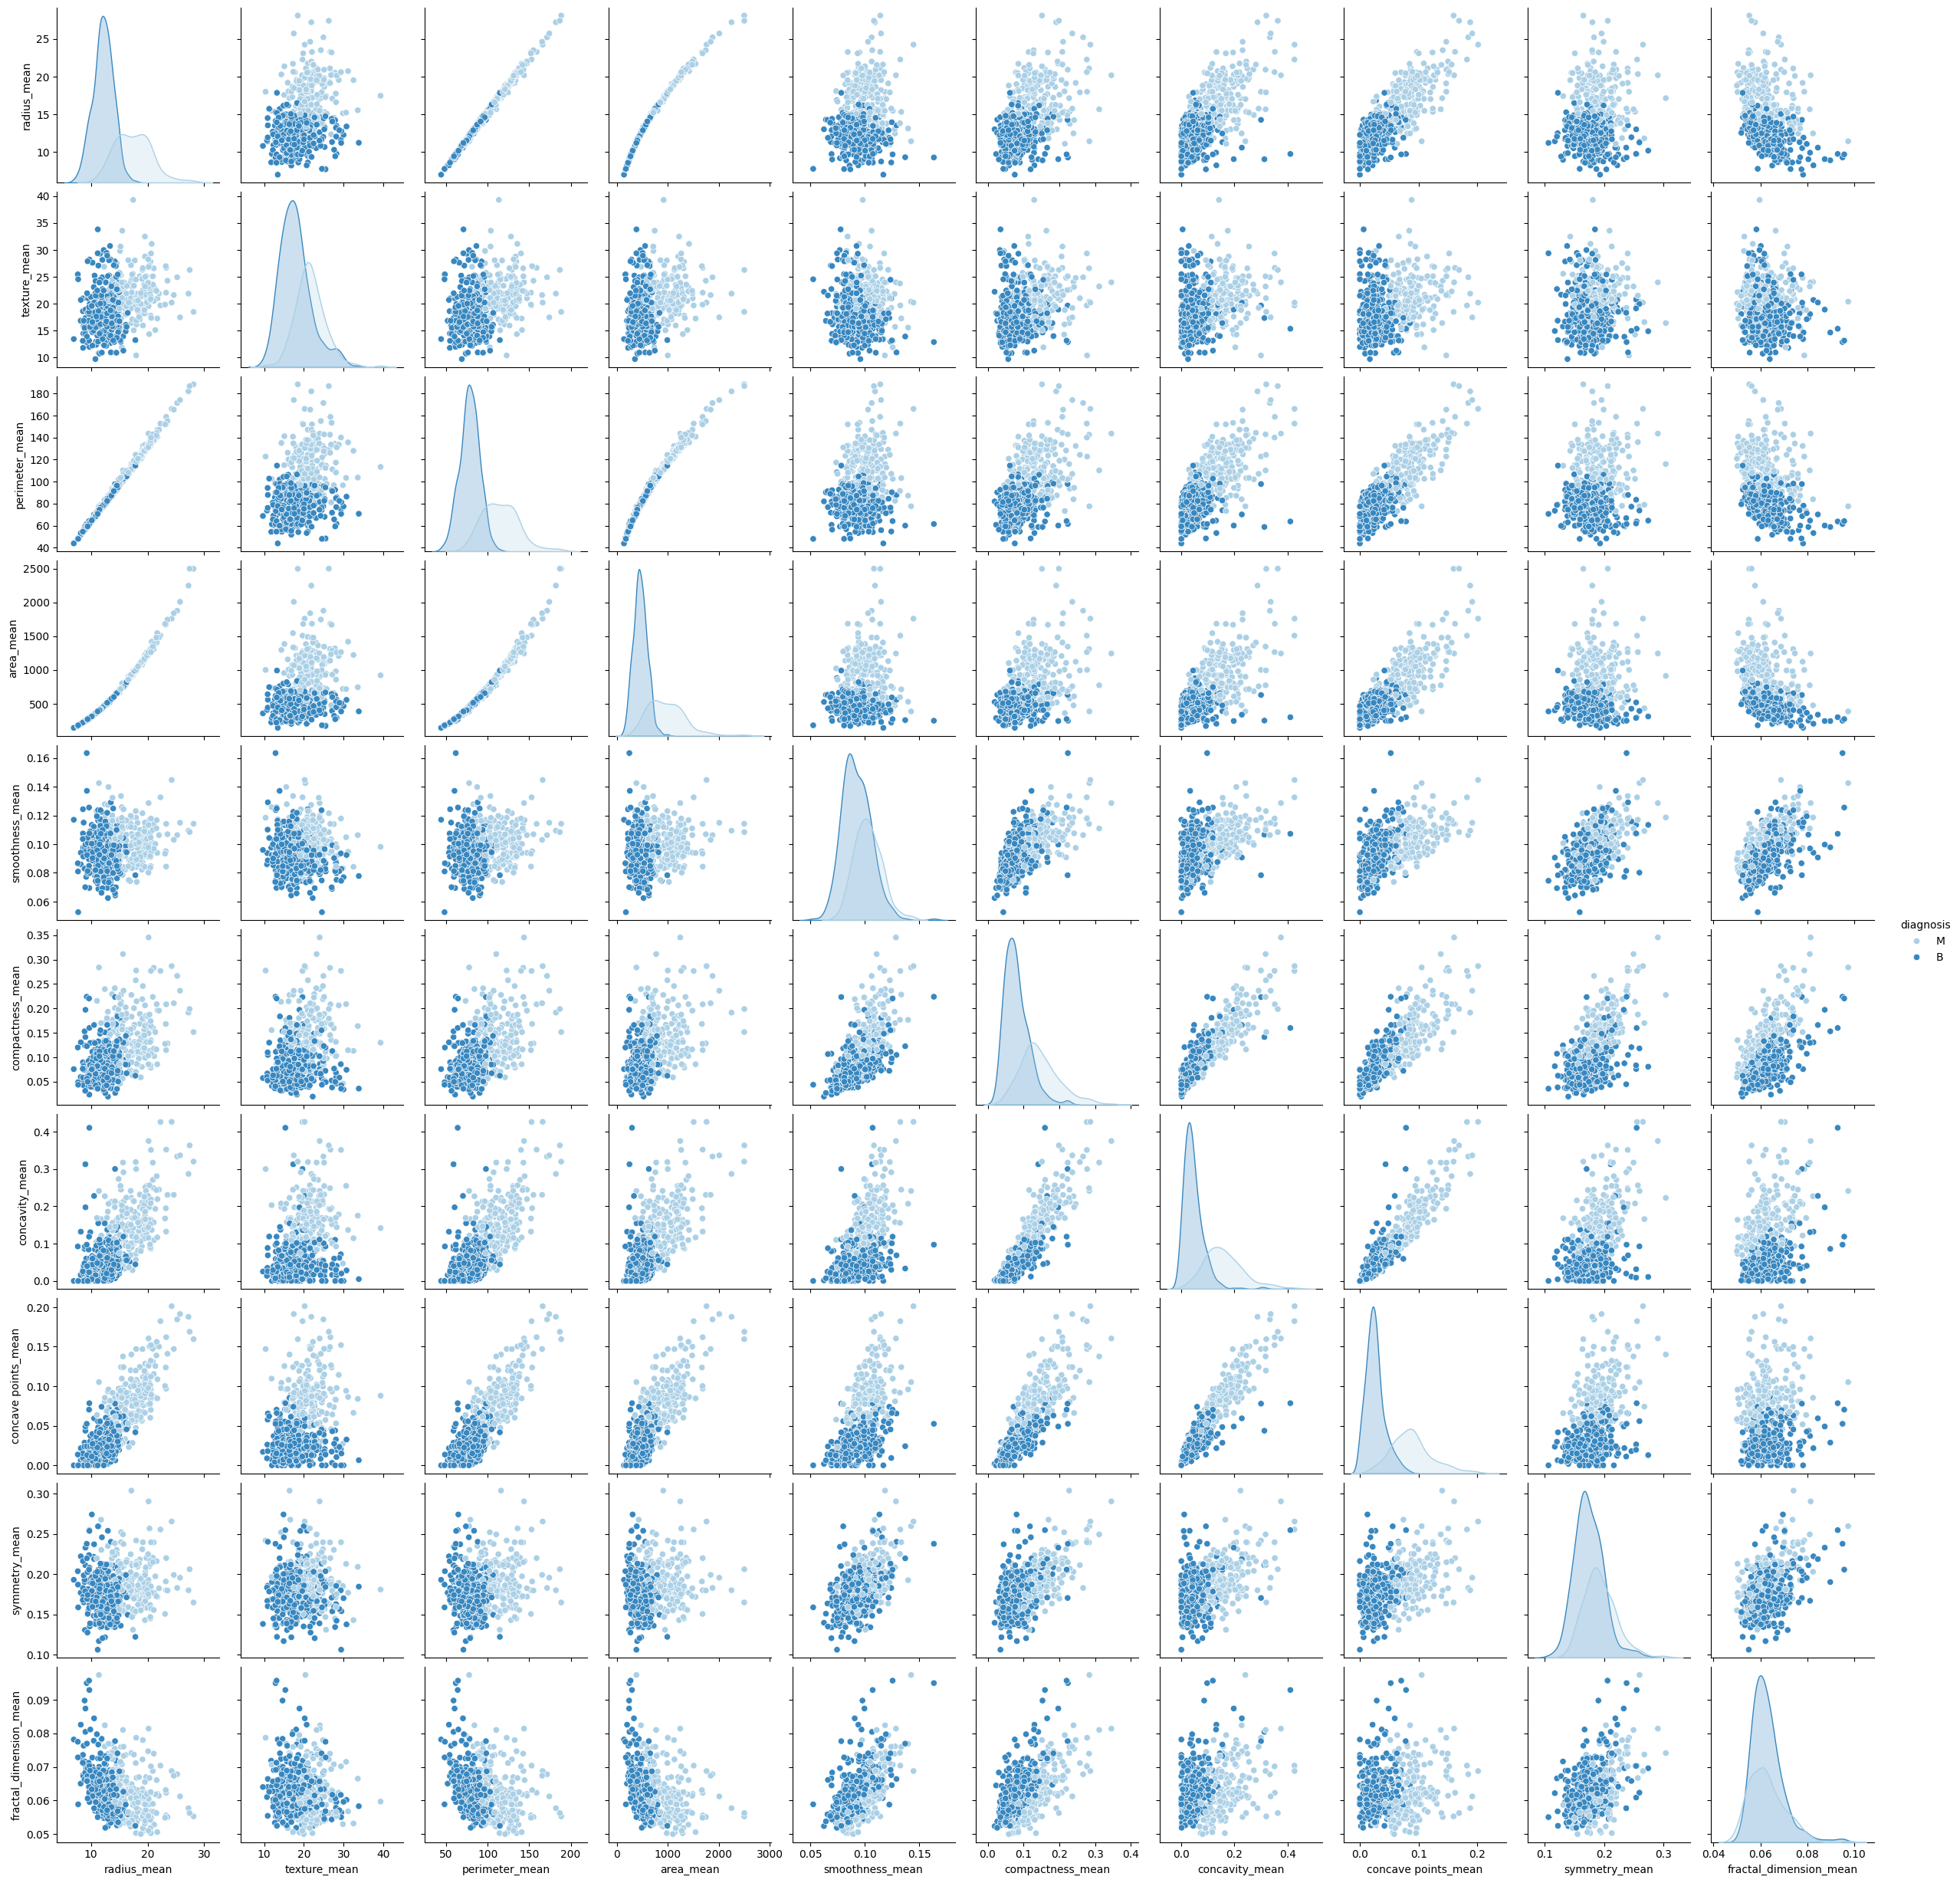

In [13]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

**Interpretation:** 👉Le pairplot des variables mean montre que les tumeurs malignes présentent des valeurs significativement plus élevées sur les mesures de taille (radius_mean, area_mean, perimeter_mean) ainsi que sur les mesures d’irrégularité de forme (concavity_mean, concave_points_mean).
Cette séparation visuelle nette entre les deux classes confirme la forte capacité discriminante de ces variables, ce qui justifie leur importance dans les modèles de classification

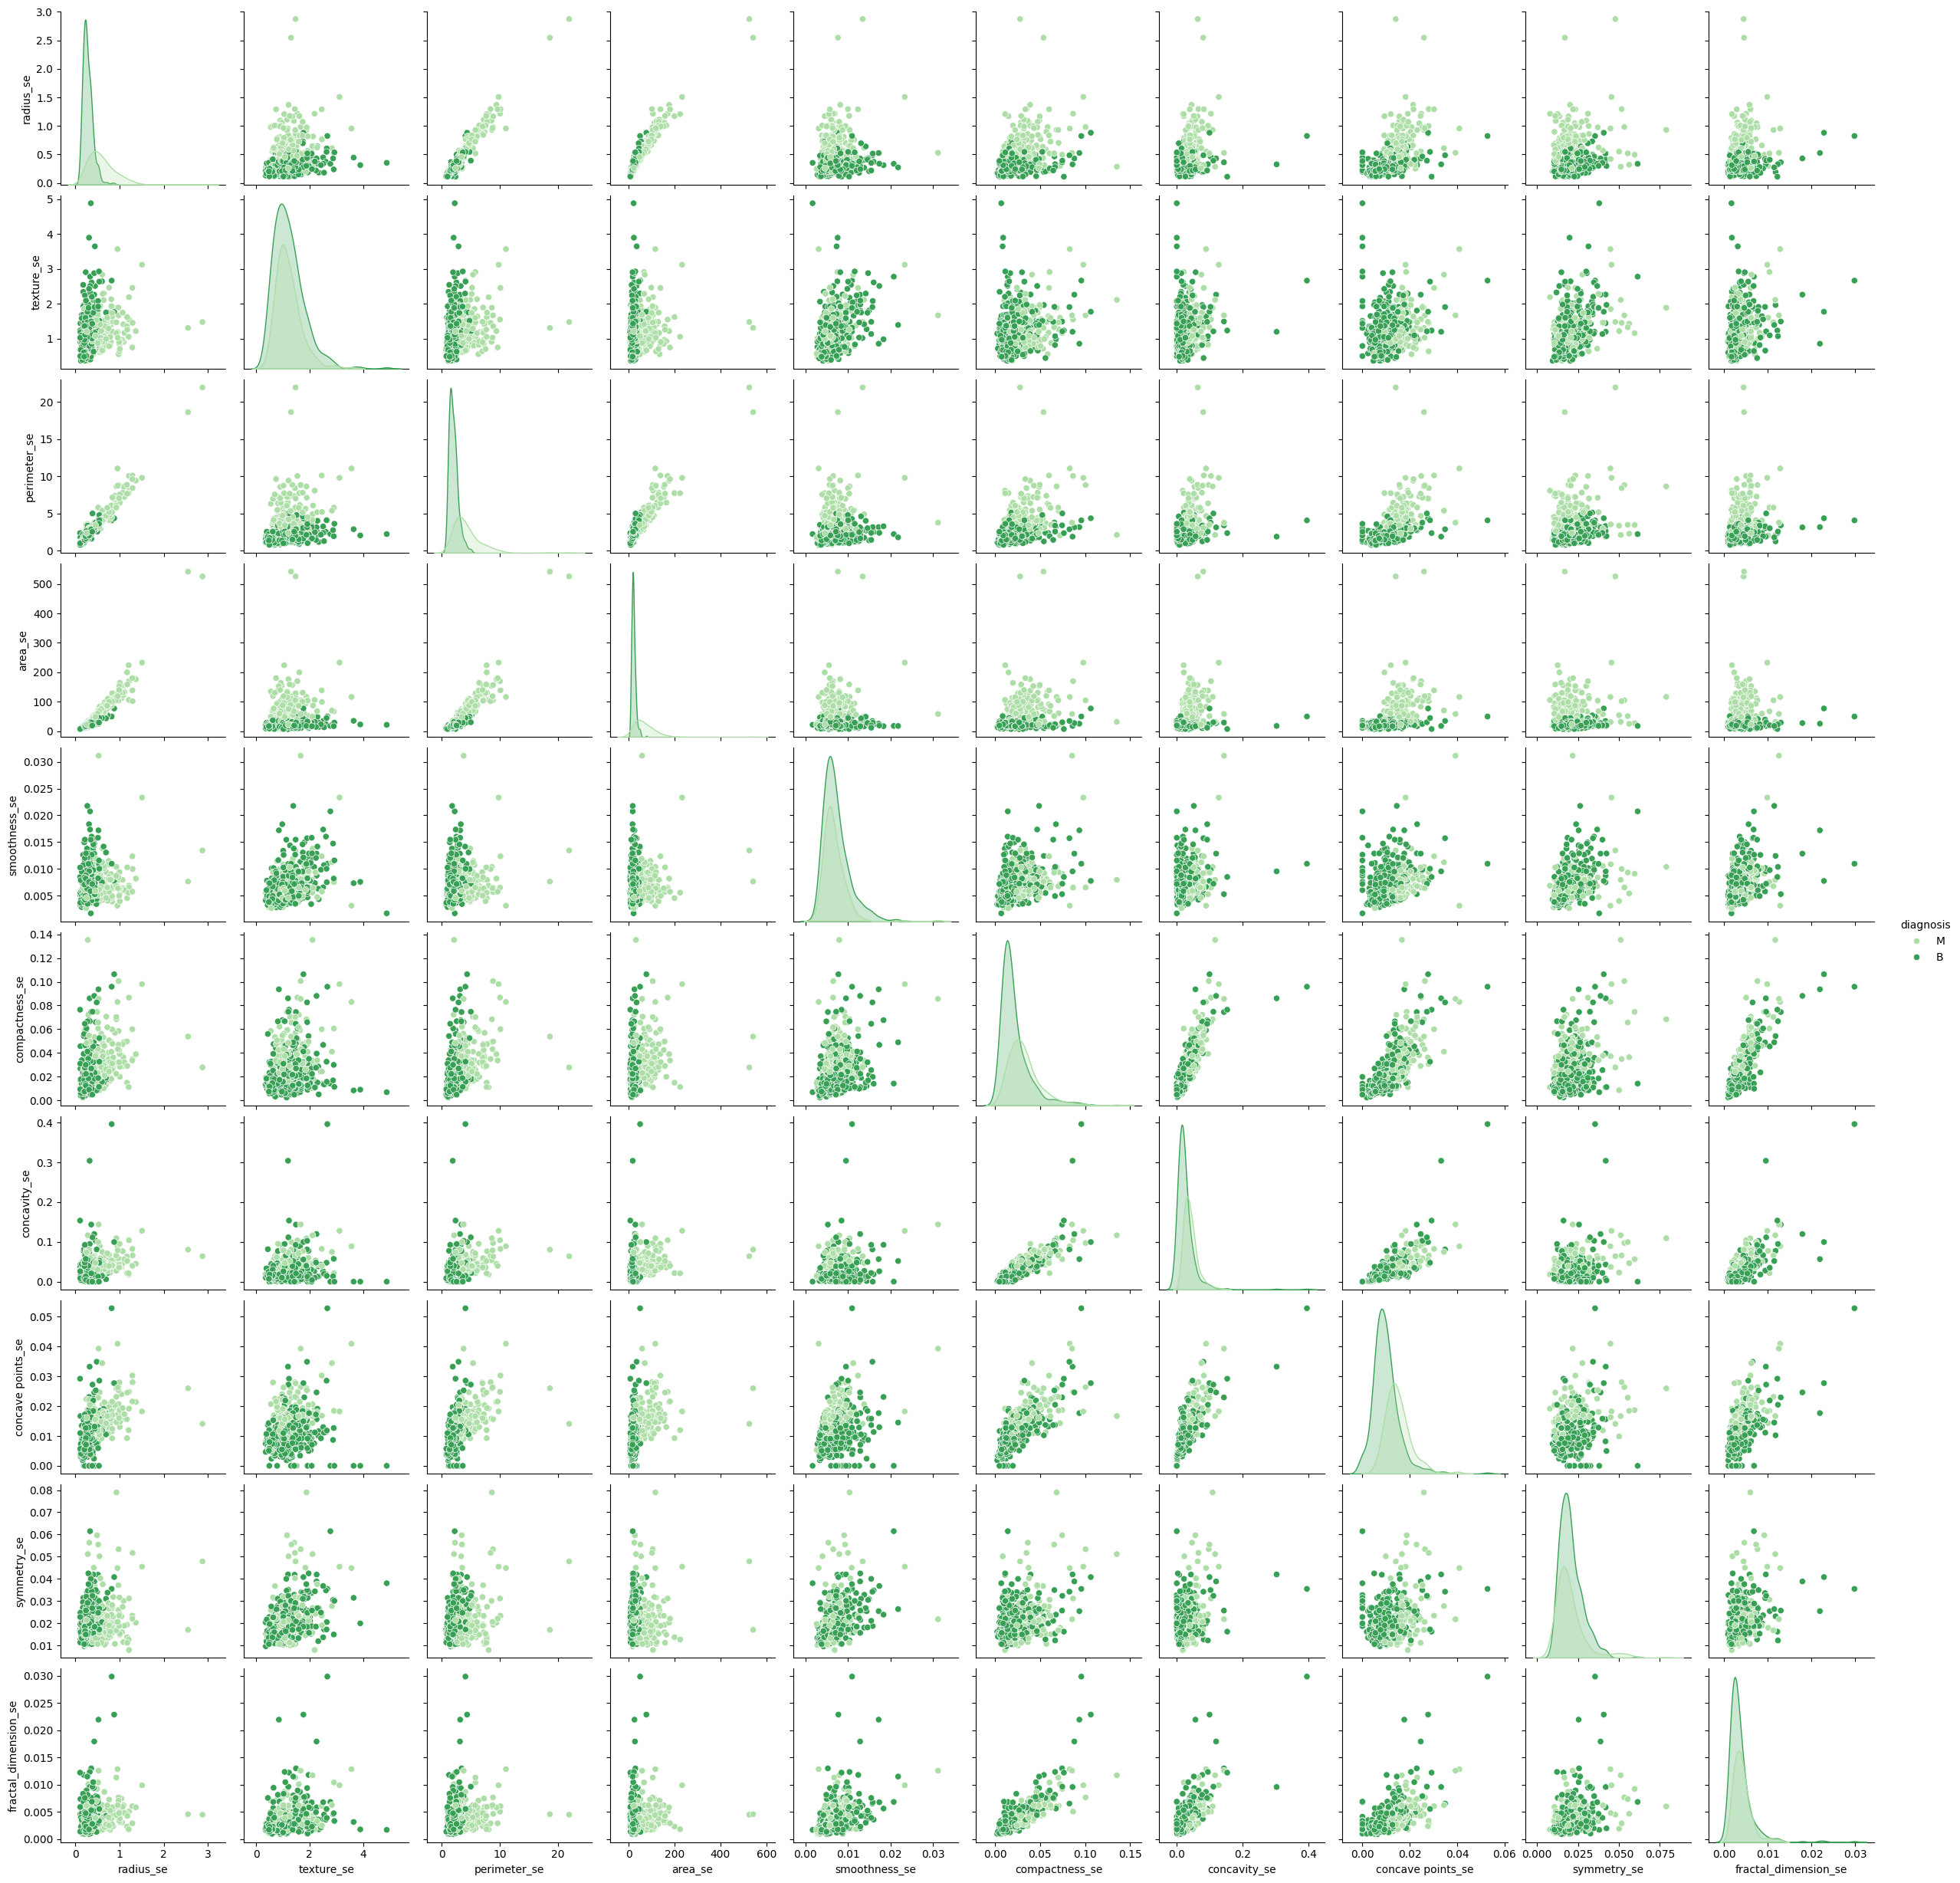

In [16]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

**Interpretation:** 👉Le pairplot des variables “standard error” montre un chevauchement important entre les tumeurs bénignes et malignes.
Bien que certaines variables telles que radius_se, area_se et perimeter_se présentent une tendance légèrement plus marquée chez les tumeurs malignes, l'ensemble des variables SE reste globalement peu discriminant, comparé aux colonnes mean ou worst.
Cela implique que leur contribution au modèle de classification est plus limitée

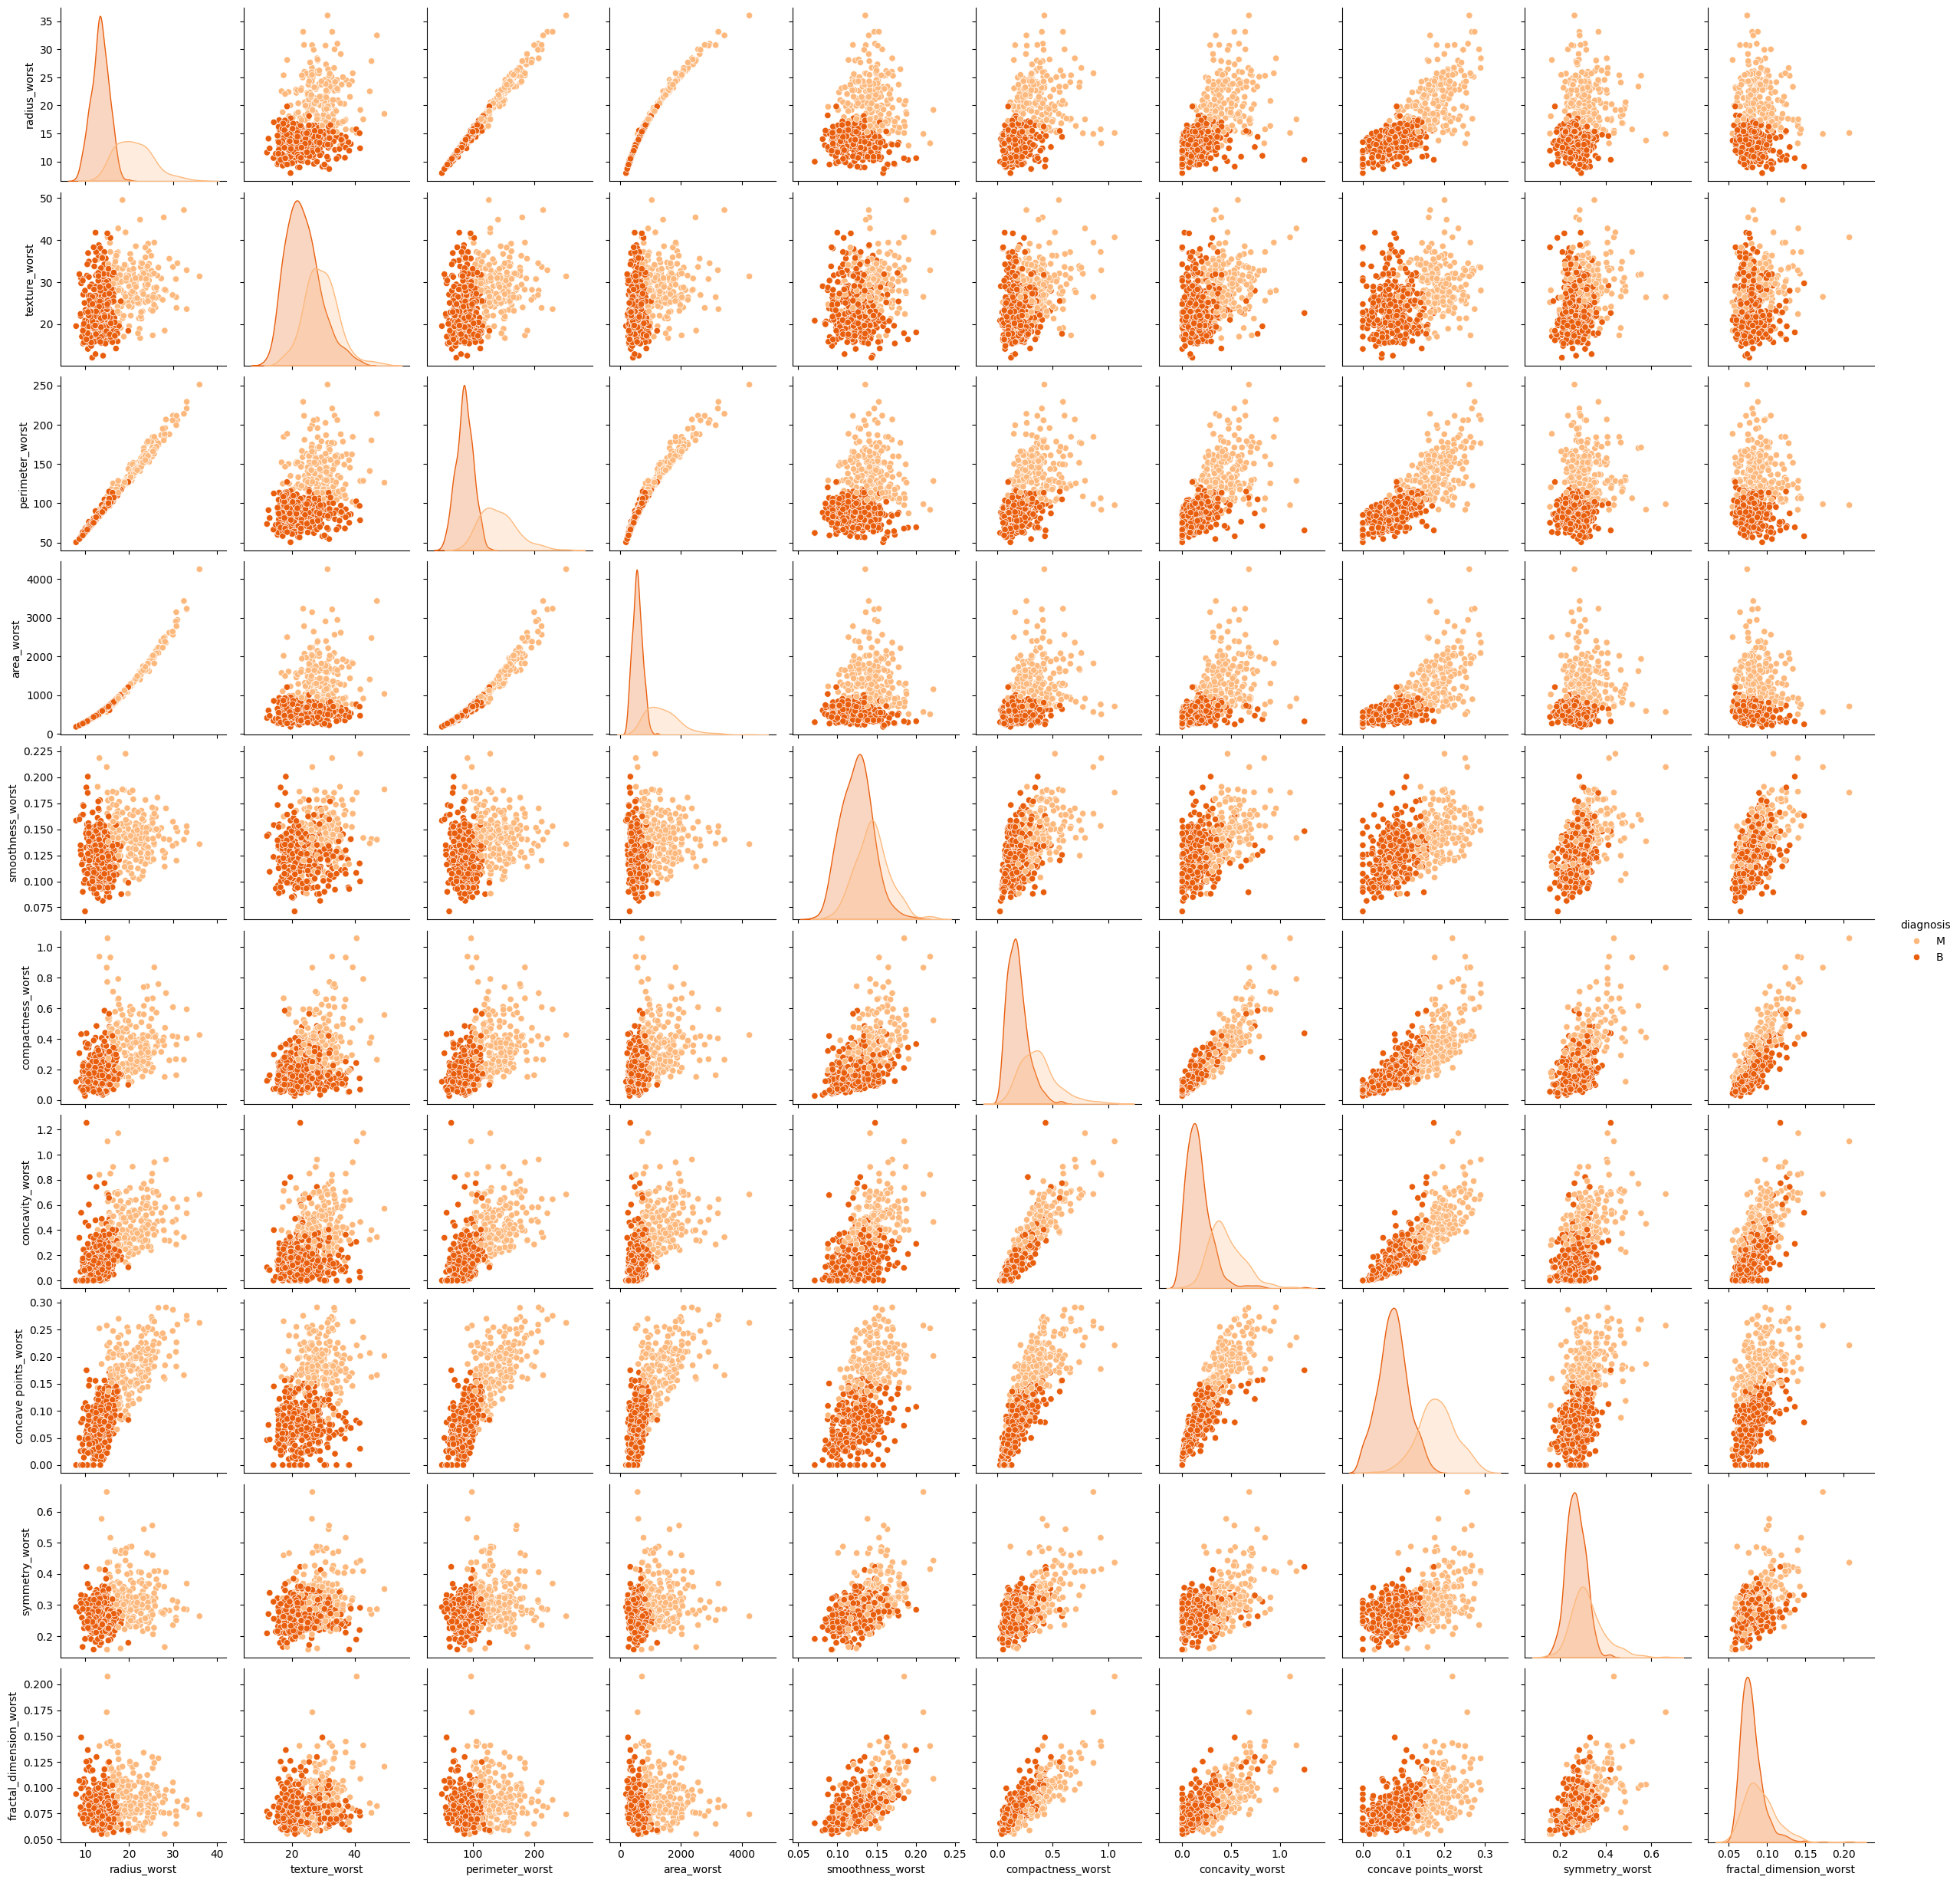

In [17]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Oranges')

**Interpretation:** 👉
Le pairplot des variables “worst” révèle une séparation particulièrement nette entre les tumeurs bénignes et malignes.
Les caractéristiques telles que radius_worst, perimeter_worst, area_worst et surtout concave_points_worst se distinguent par leur fort pouvoir discriminant, avec très peu de chevauchement entre les classes.
Ces variables représentent les formes les plus extrêmes observées dans les tumeurs et sont ainsi hautement informatives pour la classification.
Elles constituent les features les plus pertinentes pour l'entraînement d'un modèle

 Phase 3: Data Preparation


In [18]:
# drop 'Unnamed: 32' column if it exists (avoids KeyError and avoids assigning None)
if 'Unnamed: 32' in df.columns:
	df.drop('Unnamed: 32', axis=1, inplace=True)

In [19]:
# dropping id column if it exists to avoid KeyError
if 'id' in df.columns:
	df.drop('id', axis=1, inplace=True)

In [20]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [21]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

Variance expliquée par PC1: 44.90%
Variance expliquée par PC2: 18.47%
👉 Variance totale expliquée (PC1+PC2): 63.37%


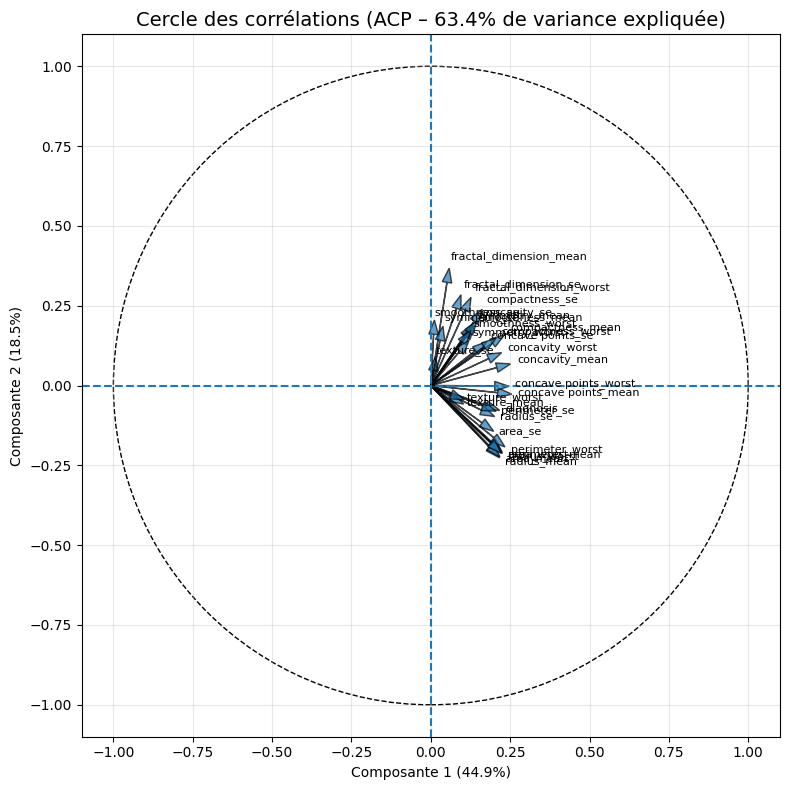

In [22]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 2️⃣ Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3️⃣ ACP (2 composantes principales)
pca = PCA(n_components=2, random_state=42)
pca.fit(X_scaled)

# 4️⃣ Résultats
pcs = pca.components_
explained_var = pca.explained_variance_ratio_ * 100
total_var = explained_var.sum()
print(f"Variance expliquée par PC1: {explained_var[0]:.2f}%")
print(f"Variance expliquée par PC2: {explained_var[1]:.2f}%")
print(f"👉 Variance totale expliquée (PC1+PC2): {total_var:.2f}%")

# 5️⃣ Cercle des corrélations
plt.figure(figsize=(8,8))
plt.title(f"Cercle des corrélations (ACP – {total_var:.1f}% de variance expliquée)", fontsize=14)
plt.xlabel(f"Composante 1 ({explained_var[0]:.1f}%)")
plt.ylabel(f"Composante 2 ({explained_var[1]:.1f}%)")

# Cercle unité
circle = plt.Circle((0,0), 1, fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Axes
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')

# 6️⃣ Flèches des variables
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, alpha=0.7, head_width=0.03, length_includes_head=True)
    plt.text(x*1.08, y*1.08, df.columns[i], fontsize=8)

# 7️⃣ Limites & layout
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
# =====================================================
# 🔍 Calcul des contributions des variables – ACP (PCA)
# =====================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 2️⃣ Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3️⃣ Application de la PCA (2 composantes principales)
pca = PCA(n_components=2, random_state=42)
pca.fit(X_scaled)

# 4️⃣ Calcul des contributions
# Les poids (loadings) représentent la corrélation entre chaque variable et chaque composante
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calcul du carré des loadings
squared_loadings = loadings ** 2

# Contribution (%) = (squared_loading / somme totale sur chaque composante) * 100
contrib = (squared_loadings / squared_loadings.sum(axis=0)) * 100

# 5️⃣ Création du tableau final
contrib_df = pd.DataFrame(
    contrib,
    columns=[f"Contribution PC{i+1} (%)" for i in range(pca.n_components_)],
    index=df.columns
).sort_values(by="Contribution PC1 (%)", ascending=False)

# 6️⃣ Affichage du tableau
print("🔹 Tableau des contributions (%) :")
display(contrib_df.round(2))

# 7️⃣ Affichage de la variance expliquée
explained_var = pca.explained_variance_ratio_ * 100
print(f"\nVariance expliquée par PC1 : {explained_var[0]:.2f}%")
print(f"Variance expliquée par PC2 : {explained_var[1]:.2f}%")
print(f"Variance totale expliquée : {explained_var.sum():.2f}%")



🔹 Tableau des contributions (%) :


Contribution PC1 (%)  Contribution PC2 (%)
concave points_mean                      6.52                  0.07
concavity_mean                           6.31                  0.46
concave points_worst                     6.07                  0.00
perimeter_worst                          5.46                  3.71
compactness_mean                         5.36                  2.51
radius_worst                             5.09                  4.53
perimeter_mean                           5.04                  4.31
concavity_worst                          4.98                  1.06
area_worst                               4.93                  4.49
area_mean                                4.75                  4.98
diagnosis                                4.71                  0.60
radius_mean                              4.68                  5.13
perimeter_se                             4.23                  0.65
compactness_worst                        4.18                  2.18
radius_se                                4.04                  0.94
area_se                                  3.92                  2.06
concave points_se                        3.11                  1.88
compactness_se                           2.62                  5.71
concavity_se                             2.13                  4.13
smoothness_mean                          1.89                  3.56
symmetry_mean                            1.77                  3.73
fractal_dimension_worst                  1.61                  7.64
smoothness_worst                         1.57                  2.97
symmetry_worst                           1.46                  2.02
texture_worst                            1.10                  0.20
texture_mean                             1.07                  0.34
fractal_dimension_se                     0.90                  8.08
fractal_dimension_mean                   0.34                 13.51
symmetry_se                              0.15                  3.46
texture_se                               0.02                  0.83
smoothness_se                            0.01                  4.22


Variance expliquée par PC1 : 44.90%
Variance expliquée par PC2 : 18.47%
Variance totale expliquée : 63.37%



 Phase 4: Modeling




 Phase 5: Evaluation


**Interpretation:** 👉 



 Phase 6: Deployment
